<a href="https://colab.research.google.com/github/aadhithyan01/Machine-Learning-1/blob/master/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libaries

In [107]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sea

Loading data

In [108]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Finding Dimension of dataframe 

In [109]:
df.shape

(891, 12)

Finding Null values in dataframe

In [110]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling null values

replacing null values in Age and Embarked columns with it's mode

In [111]:
df["Age"].mean()

29.69911764705882

In [112]:
df['Age'].fillna(30.0, inplace= True)

In [113]:
df["Embarked"].mode()

0    S
dtype: object

In [114]:
df["Embarked"].fillna('S', inplace = True)

In [115]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Dropping "Cabin" column as it contains many null values

In [116]:
df.drop(["Cabin"], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#Visualising whether Passengers survived or not based on their sex 

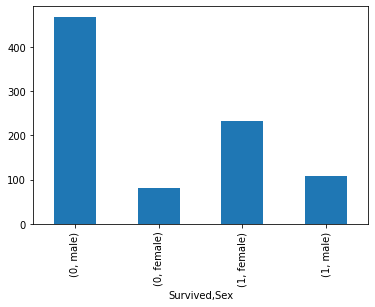

In [117]:
df["Sex"].groupby(df['Survived']).value_counts().plot(kind='bar')

#Visualising whether Passengers survived or not based on their Pclass

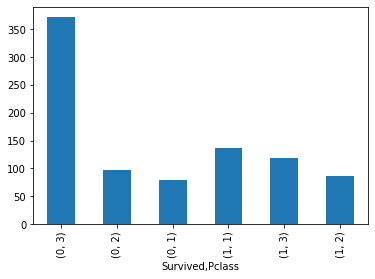

In [118]:
df["Pclass"].groupby(df['Survived']).value_counts().plot(kind='bar')

#Label Encoding

Encoding Male to 1 and female to 0

In [119]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

Encoding "Embarked" class

In [120]:
df["Embarked"] = encoder.fit_transform(df["Embarked"])
df["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

Visualizing correlation beteween the columns of dataframe

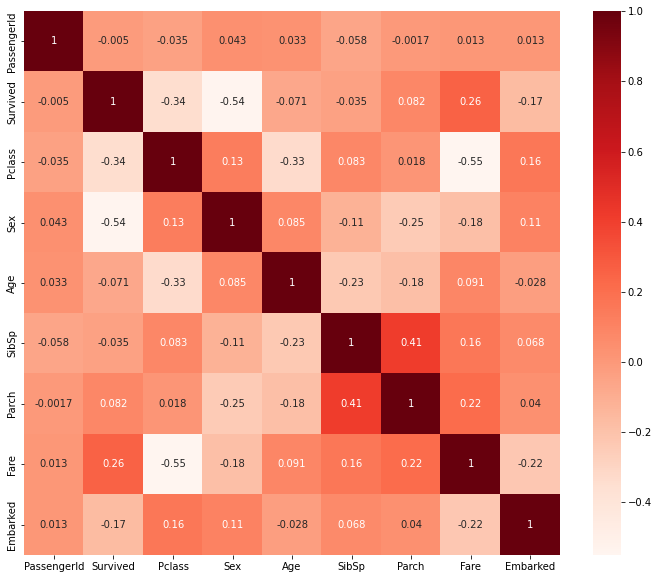

In [121]:
plt.figure(figsize=(12,10))
corr = df.corr()
sea.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# Splitting X and y

In [122]:
y = df['Survived'] 
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [123]:
X = df.drop(['Survived','Name','PassengerId','Ticket','Fare',"Cabin"],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2
...,...,...,...,...,...,...
886,2,1,27.0,0,0,2
887,1,0,19.0,0,0,2
888,3,0,30.0,1,2,2
889,1,1,26.0,0,0,0


#Splitting data into training and testing data

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = 1)
print(x_train, x_test, y_train, y_test)

     Pclass  Sex   Age  SibSp  Parch  Embarked
35        1    1  42.0      1      0         2
46        3    1  30.0      1      0         1
453       1    1  49.0      1      0         0
291       1    0  19.0      1      0         0
748       1    1  19.0      1      0         2
..      ...  ...   ...    ...    ...       ...
715       3    1  19.0      0      0         2
767       3    0  30.5      0      0         1
72        2    1  21.0      0      0         2
235       3    0  30.0      0      0         2
37        3    1  21.0      0      0         2

[668 rows x 6 columns]      Pclass  Sex   Age  SibSp  Parch  Embarked
862       1    0  48.0      0      0         2
223       3    1  30.0      0      0         2
84        2    0  17.0      0      0         2
680       3    0  30.0      0      0         1
535       2    0   7.0      0      2         2
..      ...  ...   ...    ...    ...       ...
506       2    0  33.0      0      2         2
467       1    1  56.0      0      0

#Training different ML models and fing their accuracy score

# 1. Random Forrest

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7757847533632287

In [127]:
confusion_matrix(y_test,y_predict)

array([[107,  21],
       [ 29,  66]])

In [128]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       128
           1       0.76      0.69      0.73        95

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.77      0.78      0.77       223



# 2. Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)
NB_y_predict = NB.predict(x_test)

In [130]:
accuracy_score(NB_y_predict,y_test)

0.7668161434977578

In [131]:
confusion_matrix(y_test,NB_y_predict)

array([[105,  23],
       [ 29,  66]])

In [132]:
print(classification_report(y_test, NB_y_predict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       128
           1       0.74      0.69      0.72        95

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



# 3. K Nearest Neighbours

In [133]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN_y_predict = KNN.predict(x_test)

In [134]:
accuracy_score(KNN_y_predict,y_test)

0.7443946188340808

In [135]:
confusion_matrix(y_test,KNN_y_predict)

array([[113,  15],
       [ 42,  53]])

In [136]:
print(classification_report(y_test, NB_y_predict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       128
           1       0.74      0.69      0.72        95

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



*We can clearly see that Random Forrest has more accuracy score with* **77.57 %** 

Now we have prdeict the survival for the *test.csv* and we will repeat the same data preprocessing steps for this too 

In [137]:
dftest = pd.read_csv('/content/test.csv')
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
dftest.shape

(418, 11)

In [139]:
dftest["Age"].mean()

30.272590361445783

In [140]:
dftest['Age'].fillna(30.0, inplace= True)
dftest['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    30.0
414    39.0
415    38.5
416    30.0
417    30.0
Name: Age, Length: 418, dtype: float64

In [141]:
dftest["Sex"] = encoder.fit_transform(dftest["Sex"])
dftest["Sex"]

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [142]:
dftest["Embarked"] = encoder.fit_transform(dftest["Embarked"])
dftest["Embarked"]

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64

In [143]:
test_X = dftest.drop(['Name','PassengerId','Ticket','Fare',"Cabin"],axis=1)
test_X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2
...,...,...,...,...,...,...
413,3,1,30.0,0,0,2
414,1,0,39.0,0,0,0
415,3,1,38.5,0,0,2
416,3,1,30.0,0,0,2


In [144]:
dftest["Age"].head(50)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    30.0
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
20    55.0
21     9.0
22    30.0
23    21.0
24    48.0
25    50.0
26    22.0
27    22.5
28    41.0
29    30.0
30    50.0
31    24.0
32    33.0
33    30.0
34    30.0
35    18.5
36    30.0
37    21.0
38    25.0
39    30.0
40    39.0
41    30.0
42    41.0
43    30.0
44    45.0
45    25.0
46    45.0
47    30.0
48    60.0
49    36.0
Name: Age, dtype: float64

In [145]:
test_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [146]:
test_X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2
...,...,...,...,...,...,...
413,3,1,30.0,0,0,2
414,1,0,39.0,0,0,0
415,3,1,38.5,0,0,2
416,3,1,30.0,0,0,2


In [147]:
survivors = rf.predict(test_X)
survivors

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

I got **73.923%** cn submitting Survival_prediction.csv in kaggle 

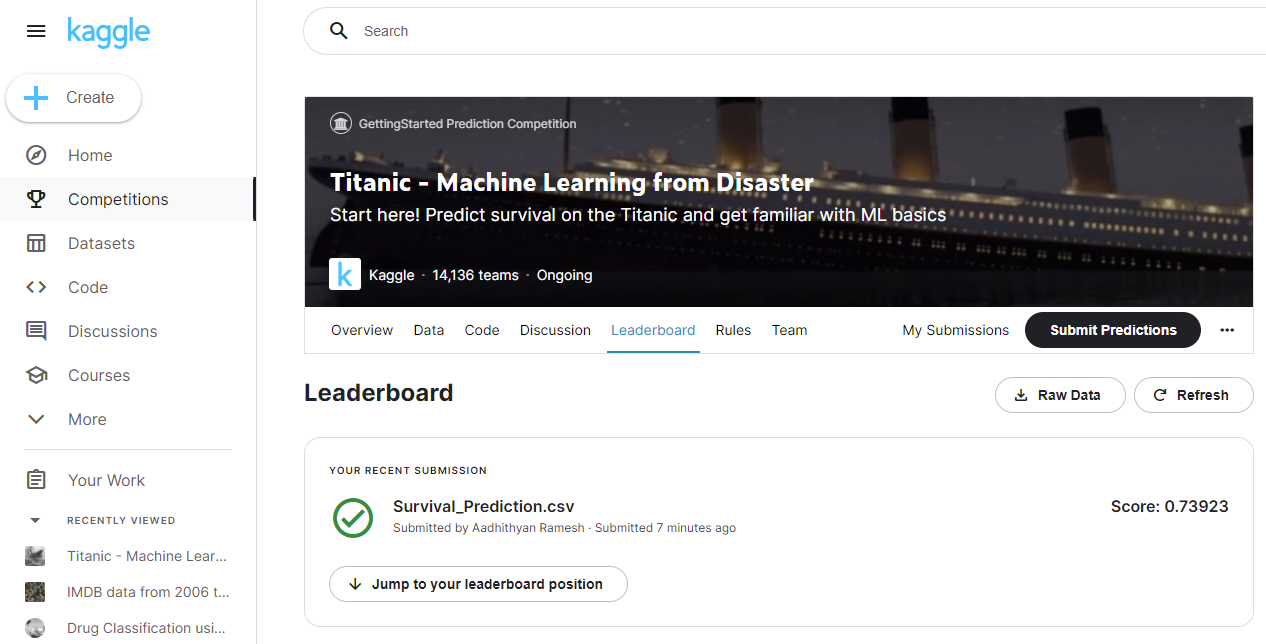